In [13]:
## K Means clustering model from scratch
## This is an unsupervised learning model, i.e. it works with unlabelled data
## The objective is to minimize the sum of within cluster sum of squares
## WCSS of a cluster is the sum of the square of the difference between each data point in the cluster and the centroid of the cluster
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
  # Initialization of the KMeans class
  def __init__ (self, n_clusters = 3, max_iter = 100, tolerance = 1e-14, random_state = 42):
    """
      n_clusters is the number of clusters
      max_iter is the maximum number iterations (going through the algorithm steps __ times)
      tolerance is the tolerance for change in centroid, i.e. if the difference of the last centroid and the centroid chosen in the current step does not exceed this value, STOP training
    """
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.tol = tolerance
    self.random_state = random_state
    self.centroids = None

  def fit(self, X):
    # Defining the fit method, to train the model
    np.random.seed(self.random_state) # to make the model recreateable, due to the random element of the algorithm
    n_samples, n_features = X.shape
    ## Training algorithm
    # Step 1 : Random;y select clusters from the data points
    random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
    self.centroids = X[random_indices]

    for i in range(self.max_iter):
      # Step 2 : Assign each data point to the neares centroid
      self.labels = self.predict(X)

      # Step 3 : Compute the new centroids as the mean of the clusters (This is the centroid value that minimizes the WCSS the most, essentially acheiving our objective iteratively)
      new_centroids = np.array([X[self.labels == k].mean(axis = 0) for k in range(self.n_clusters)])

      # Step 4 : Check for tolerance, (if the centroids are indeed changing i.e. Converging)
      if np.all(np.abs(new_centroids - self.centroids) < self.tol):
          break
      # Assign the means of the clusters as the new centroids if there is indeed convergence, else the algorithm stops
      self.centroids = new_centroids

  def predict(self, X):
    # Method to assign the datapoints to the clusters of the nearest centroid
    distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
    return np.argmin(distances, axis=1)

  def plot_clusters(self, X):
    # Method to visualize centroids and clusters
    # Only plots it using 2 features
    plt.figure(figsize = (10,10))
    for k in range(self.n_clusters):
      cluster_points = X[self.labels == k]
      plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {k}")
      plt.scatter(self.centroids[:, 0], self.centroids[:, 1], color='black', marker='X', s=100, label='Centroids')
    plt.title("K-Means Clustering")
    plt.legend()
    plt.show()



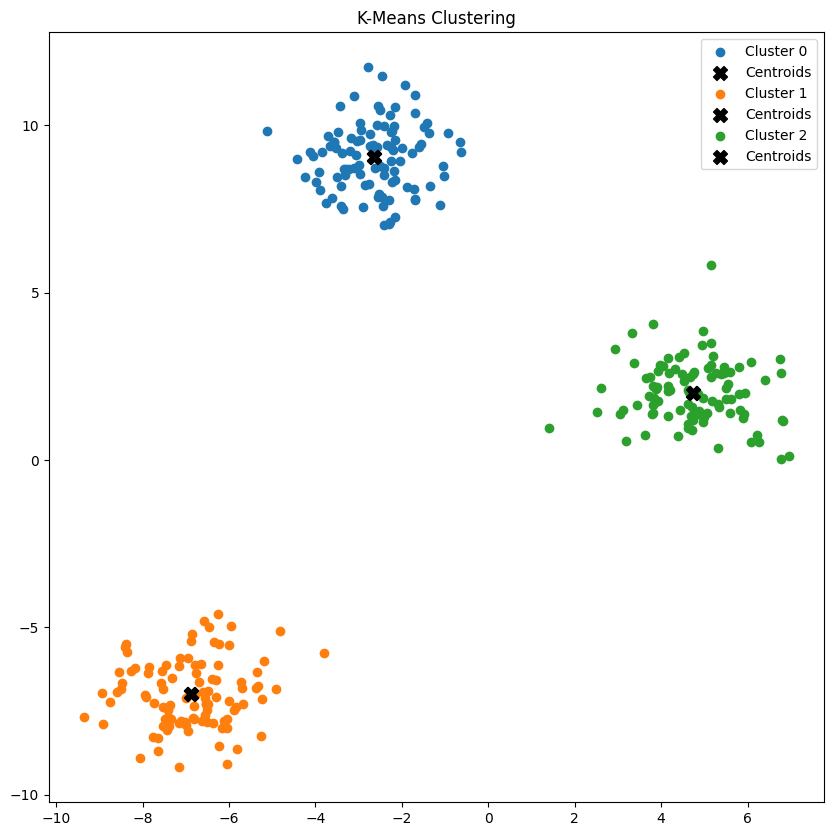

In [14]:
## Generate synthetic dataset

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# Initialize and fit KMeans
KMeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
KMeans.fit(X)

# Plot clusters
KMeans.plot_clusters(X)


In [ ]:
## Noice